In [23]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice

import sys
sys.path.append("../..")

In [25]:
import surp.analysis_scripts.rc_params
import surp.analysis_scripts.gas_phase_data as gap
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.apogee_analysis as aah
from surp .analysis_scripts.vice_model import vice_model

In [26]:
berg19 = pd.read_csv("../data/berg19.csv")

In [27]:
berg19 = berg19.iloc[:-1]

In [28]:
cooke17 = pd.read_csv("../data/cooke17.csv")

In [56]:
RL = pd.read_csv("../data/extragalactic_RL.csv", sep="\t+")

/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [57]:
RL.convert_dtypes()

,source,galaxy,class,object,eps_c,c_err,eps_n,n_err,eps_o,o_err,eps_fe,fe_err
0,E02,NGC 5471,?,?,NaN,NaN,6.51,0.15,8.03,0.05,NaN,NaN
1,E09,M31,S,K932,8.46,0.13,7.63,0.06,8.62,0.03,5.90,0.09
2,E09,M33,Sc,NGC 595,8.53,0.12,7.53,0.10,8.69,0.05,5.55,0.21
3,E09,M33,Sc,NGC 604,8.40,0.11,7.49,0.07,8.60,0.03,5.94,0.11
4,E09,NGC 2366,Ir,NGC 2363,7.75,0.09,6.70,0.10,8.04,0.05,5.71,0.23
5,E09,NGC 2403,Sc,VS 24,8.46,0.24,7.35,0.07,8.37,0.04,5.71,0.19
6,E09,NGC 2403,Sc,VS 38,8.50,0.15,7.23,0.11,8.29,0.05,5.58,0.35
7,E09,NGC 2403,Sc,VS 44,8.32,0.18,7.52,0.08,8.61,0.04,6.13,0.12
8,E09,M101,Sc,H1013,8.67,0.12,7.82,0.19,8.73,0.09,5.98,0.26
9,E09,M101,Sc,NGC 5461,8.30,0.20,7.54,0.11,8.49,0.06,6.15,0.21


In [60]:
RL["[c/o]"] = aah.log_to_bracket(RL.eps_c - RL.eps_o,
                                       "c", "o")
RL["[o/h]"] = aah.log_to_bracket(RL.eps_o, "o") - 12
RL["[c/o]_err"] = RL.c_err + RL.o_err
RL["[o/h]_err"] = RL.o_err 

<ErrorbarContainer object of 3 artists>

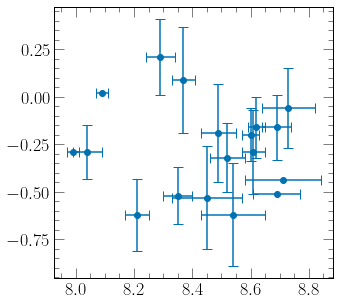

In [65]:
plt.errorbar(RL.eps_o, RL.eps_c - RL.eps_o,
            xerr=RL.o_err, yerr=RL.o_err + RL.c_err,
            fmt="o")

Text(0, 0.5, 'log C/O')

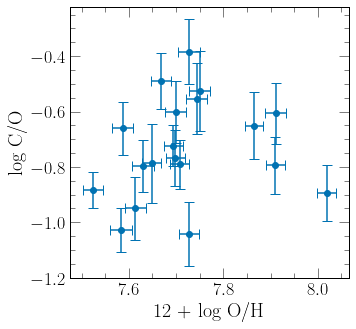

In [32]:
plt.errorbar(berg19.eps_o, berg19.log_c_o, xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err, fmt="o")
plt.xlabel("12 + log O/H")
plt.ylabel("log C/O")

<ErrorbarContainer object of 3 artists>

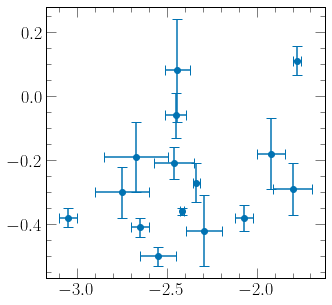

In [33]:
plt.errorbar(cooke17.o_h, cooke17.c_o, xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, fmt="o")

In [34]:
berg19["[c/o]"] = berg19.log_c_o + np.log10(12/16) - np.log10(vice.solar_z("c")/vice.solar_z("o"))
berg19["[o/h]"] = berg19.eps_o + np.log10(16) - np.log10(vice.solar_z("o")) - 12

In [36]:
fiducial = vice_model("../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.4_lateburst.json")

In [67]:
from astropy.io import fits

In [69]:
table = fits.open("../data/J_A+A_568_A25_table5.dat.fits")[1]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2ac18bbd9ac8>, <astropy.io.fits.hdu.table.TableHDU object at 0x2ac18bd02b38>]

In [95]:
N14 = table.data

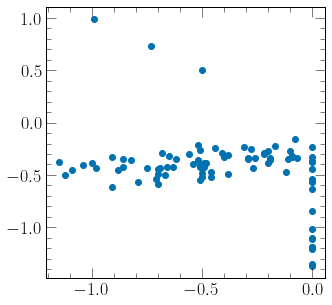

In [98]:
plt.scatter(N14["[O/H]3n"], N14["[C/H]n"]-N14["[O/H]3n"])

In [102]:
F09 = pd.read_csv("../data/Fabbian09.csv", sep="\s+")

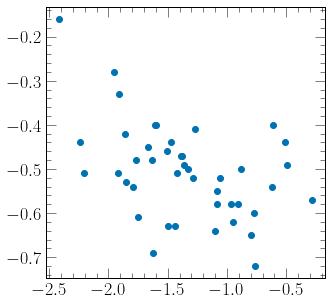

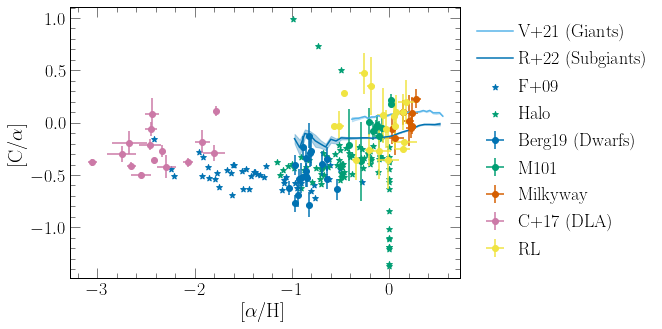

In [109]:
plt.figure(figsize=(7,5))
pluto.err_scatter(berg19["[o/h]"], berg19["[c/o]"], xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err,
                  label="Berg19 (Dwarfs)")

# fiducial.plot_gas("[o/h]", "[c/o]", label="Model")
gap.plot_all("[o/h]", "[c/o]")

pluto.err_scatter(cooke17.o_h, cooke17.c_o, xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, 
                  label="C+17 (DLA)")
pluto.err_scatter(RL["[o/h]"], RL["[c/o]"], xerr=RL["[o/h]_err"], yerr=RL["[c/o]_err"],
                  label="RL")

df = aah.vincenzo2021()
pluto.plot_mean_track(df["[mg/h]"], df["[c/mg]"], xlim=(-0.4, 0.6), label="V+21 (Giants)", shade_width=True, err_mean=True)

subgiants = aah.subgiants
filt = ~np.isnan(subgiants["C_MG"])
filt &+ ~np.isnan(subgiants["MG_H"])
df = subgiants[filt]
pluto.plot_mean_track(df["MG_H"], df["C_MG"], xlim=(-1, 0.6), label="R+22 (Subgiants)", shade_width=True, err_mean=True)
plt.scatter(F09.oh, F09.co, label="F+09", marker="*")

plt.xlabel(r"[$\alpha$/H]")
plt.ylabel(r"[C/$\alpha$]")
plt.scatter(N14["[O/H]3n"], N14["[C/H]n"]-N14["[O/H]3n"], marker="*", label="Halo")

pluto.legend_outside()

Redshift: (Pettini et al. 2000;
Fosbury & Villar-Martín et al. 2003; Erb et al. 2010; Christensen
et al. 2012; Bayliss et al. 2014; James et al. 2014; Stark et al.
2014; Steidel et al. 2016; Vanzella et al. 2016; Amorín et al.
2017; Berg et al. 2018; Rigby et al. 2018)

RL: (teal squares: Esteban et al. 2002, 2009,
2014; Pilyugin & Thuan 2005; García-Rojas & Esteban 2007;
López-Sánchez et al. 2007).

CL: Senchyna et al. (2017) and Peña-Guerrero et al. (2017)

MW stars: Gustafsson et al. (1999), Akerman
et al. (2004), Fabbian et al. (2009), and Nissen et al. (2014)